# **1. Load the dataset. (1)**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving text.csv to text.csv
Saving Life_Expectancy_Data.csv to Life_Expectancy_Data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
life_df = pd.read_csv('Life_Expectancy_Data.csv')
#Here i displayed all the column names to find any irregularities like white spaces or
#columns starting with a Lower case, etc
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
# Renaming columns
life_df.rename(columns={'Life expectancy ': 'Life expectancy', 'infant deaths': 'Infant deaths',
                        'percentage expenditure': 'Percentage expenditure', 'Measles ':'Measles',
                        ' BMI ':'BMI','under-five deaths ':'Under five deaths', 'Diphtheria ':'Diphtheria',
                        ' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'Thinness  1-19 years',
                        ' thinness 5-9 years':'Thinness 5-9 years'}, inplace=True)

life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness  1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

# **2. Display the first 20 rows. (1)**

In [ ]:
life_df.head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


# **3. Find the number of null values in the dataset. (1)**


In [ ]:
missing_values = life_df.isna().sum()
print("The number of missing values per column is:\n",missing_values)

The number of missing values per column is:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


# **4. Impute the missing values with the mean values of the data. You can use SimpleImputer**
from sklearn.impute. (1)

In [ ]:
#In order to get the mean values of the data and not the most-frequent (mode)
#I had to create a subset of the Data Frame that contains only numeric values
numeric_df = life_df.select_dtypes(include=['number'])

# Create an instance of SimpleImputer with strategy='mean' to fill missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data and transform to impute missing values with the mean
imputed_data = imputer.fit_transform(numeric_df)

# Convert the imputed data back to a DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=numeric_df.columns)


print("\nDataFrame with missing values imputed using mean:")
print(df_imputed)


DataFrame with missing values imputed using mean:
        Year  Life expectancy  Adult Mortality  Infant deaths  Alcohol  \
0     2015.0             65.0            263.0           62.0     0.01   
1     2014.0             59.9            271.0           64.0     0.01   
2     2013.0             59.9            268.0           66.0     0.01   
3     2012.0             59.5            272.0           69.0     0.01   
4     2011.0             59.2            275.0           71.0     0.01   
...      ...              ...              ...            ...      ...   
2933  2004.0             44.3            723.0           27.0     4.36   
2934  2003.0             44.5            715.0           26.0     4.06   
2935  2002.0             44.8             73.0           25.0     4.43   
2936  2001.0             45.3            686.0           25.0     1.72   
2937  2000.0             46.0            665.0           24.0     1.68   

      Percentage expenditure  Hepatitis B  Measles   BMI  Un

# **5. Find the count, mean, standard deviation, quartiles and extrema for the numeric**
columns. (1)


In [ ]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# **6. Find the correlation between the numeric columns and display your findings on a**
heatmap. (2)

In [ ]:
corr = life_df.select_dtypes(include='number').corr()
corr

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
Infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


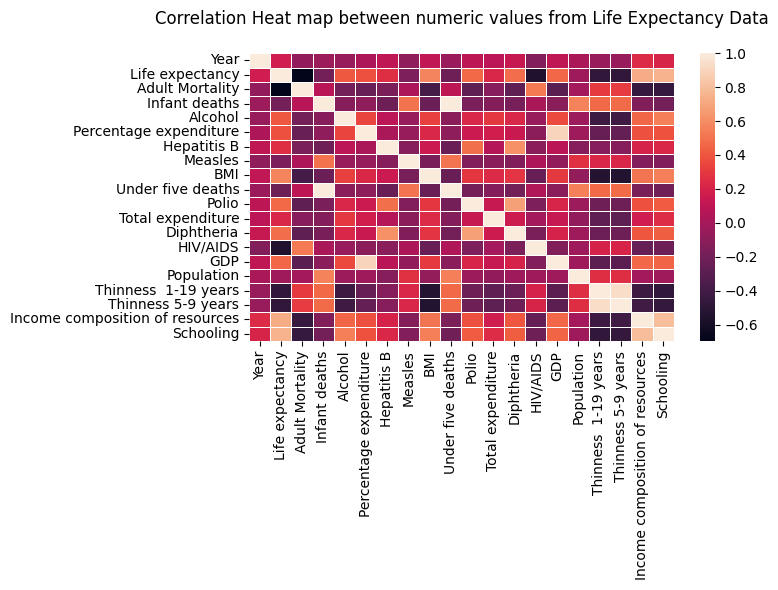

Based on this Heat map we can see a strong Correlation between some columns like: 
 Life Expectancy and Schooling, Income composition of Resources and Life expectancy , Schooling and Income composition of Resources


In [ ]:
from ctypes import alignment
plt.figure(figsize=(8,6))
ax = sb.heatmap(corr, linewidth=0.5)
plt.title('Correlation Heat map between numeric values from Life Expectancy Data\n',loc='center')
plt.tight_layout()
plt.show()
print('Based on this Heat map we can see a strong Correlation between some columns like: \n Life Expectancy and Schooling, Income composition of Resources and Life expectancy , Schooling and Income composition of Resources')


# **7. Plot a histogram of the life expectancy. (2)**


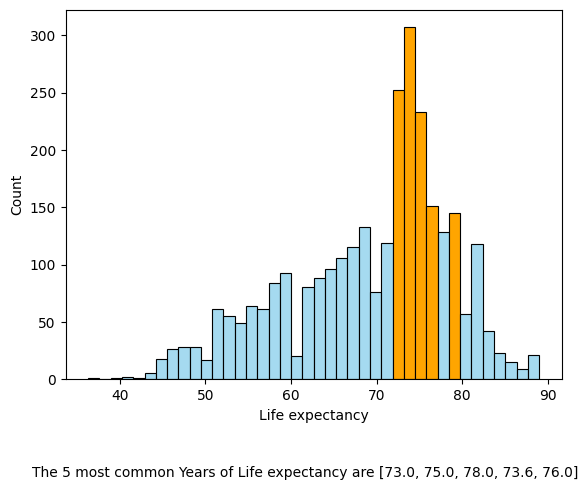

In [ ]:
#Import Counter from collections
from collections import Counter

# Create a variable to hold just the life expectancy value from the data set
life_exp = life_df['Life expectancy']
# Count occurrences of each value
value_counts = Counter(life_exp)

# Extract top five values
top_five_values = [value for value, _ in value_counts.most_common(5)]

#Plot a histogram of Life Expectancy
ax = sb.histplot(data=life_df['Life expectancy'], bins=40, color='skyblue')

#Get the top 5 bar heights and highlighting them in orange
bar_heights = [bar.get_height() for bar in ax.patches]
top_five_heights = sorted(bar_heights, reverse=True)[:5]
for bar in ax.patches:
    if bar.get_height() in top_five_heights:
        bar.set_facecolor('orange')

#Dispay the top 5 Life expectancy values in the plot
plt.figtext(0.5, -0.1, f'The 5 most common Years of Life expectancy are {top_five_values}', horizontalalignment='center', verticalalignment='bottom', fontsize=10)

plt.show()

# **8. Compare the life expectancy in developed countries to that in developing countries using**
violin plots next to each other. (2)

<Axes: xlabel='Status', ylabel='Life expectancy'>

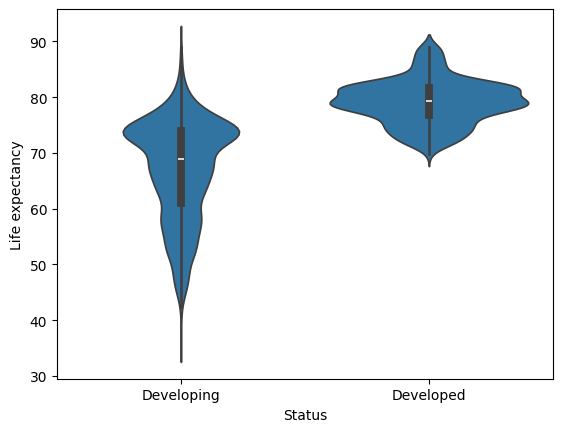

In [ ]:
sb.violinplot(data=life_df, x="Status", y="Life expectancy")

# **9. On the same line plot, display the life expectancy from 2000 to 2015 for Canada, the**
United Kingdom and the United States of America. (2)

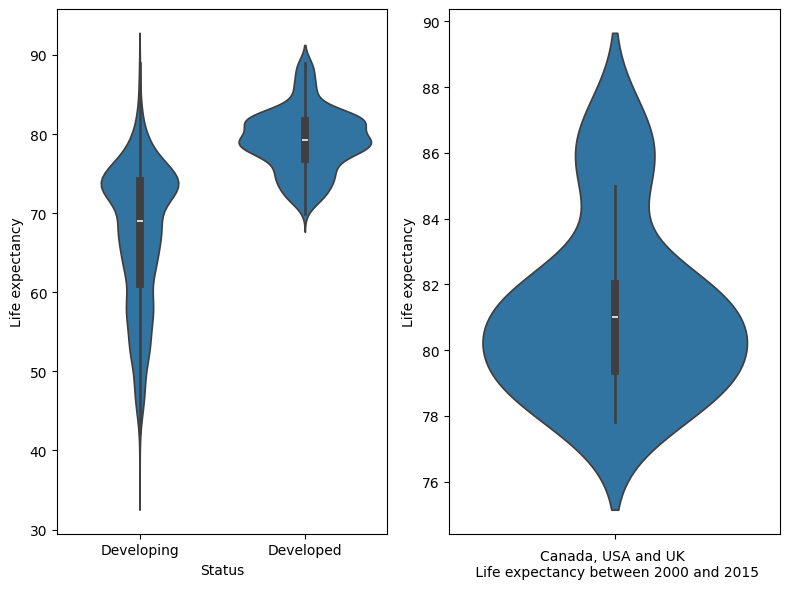

In [ ]:
life_df['Country'].unique()

#Get the dessired country names
countries = ['United States of America ','United Kingdom of Great Britain and Northern Ireland','Canada']

#Get data of years between 2000 and 2015 and from the dessired countries
sub_df = life_df[(life_df['Year'].between(2000,2015)) & life_df['Country'].isin(countries)]

plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sb.violinplot(data=life_df, x="Status", y="Life expectancy")

plt.subplot(1,2,2)
sb.violinplot(data=sub_df, y="Life expectancy")
plt.xlabel("Canada, USA and UK \n Life expectancy between 2000 and 2015")

plt.tight_layout()
plt.show()

# **10. Compare the average infant deaths over the years against the average life expectancy**
over the years using a scatter plot for the following countries: Belgium, Brazil,
Cameroon, Canada, China, France, Ghana, India, the United Kingdom and the United
States of America. What can you conclude? (2)

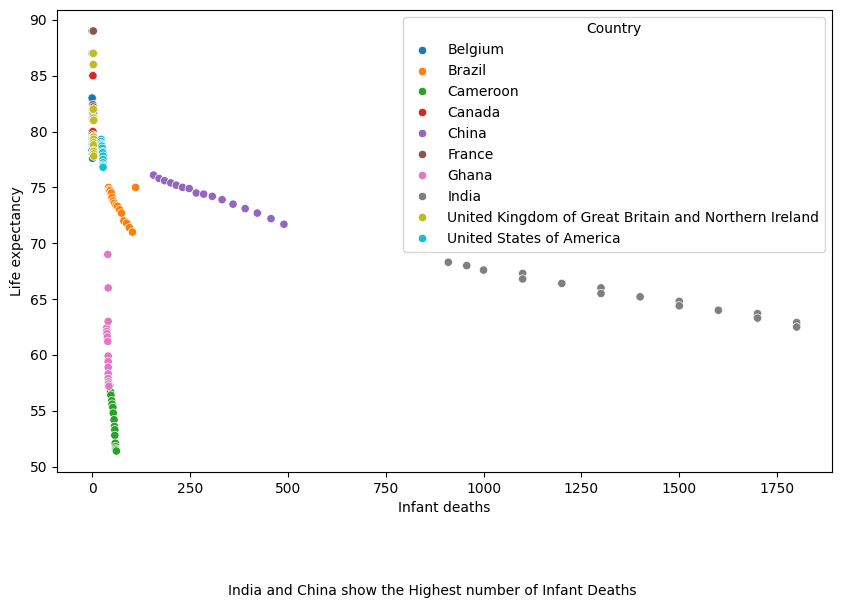

In [ ]:
# Get dessired countries
countries = ['Belgium', 'Brazil','Cameroon', 'Canada', 'China', 'France', 'Ghana', 'India',
             'United Kingdom of Great Britain and Northern Ireland','United States of America']

#Get data from the dessired countries
sub_df = life_df[life_df['Country'].isin(countries)]

#Plot the scatterplot
plt.figure(figsize=(10,6))
sb.scatterplot(data=sub_df, x='Infant deaths', y="Life expectancy", hue='Country')

plt.figtext(0.5, -0.1,"India and China show the Highest number of Infant Deaths", horizontalalignment='center', verticalalignment='bottom', fontsize=10)
plt.show()



# **In the year 2012**


1.   Compare the life expectancy with schooling using a scatter plot. (2)
2.   What is the Pearson correlation? (1)
3.   Draw the best regression line on the same plot as (1). (1)
4.   What can you conclude? (1)



Correlation in 2012 between Life expectancy and Schooling is :  0.7991036861565874


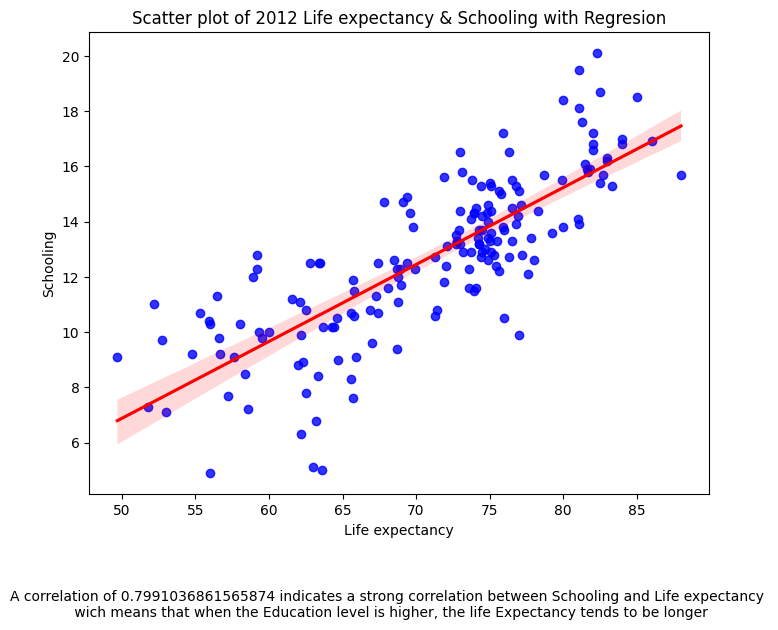

In [ ]:
# Select data from 2012
sub2012_df = life_df[(life_df['Year']==2012)]

# b. What is the Pearson correlation?
correlation= sub2012_df["Life expectancy"].corr(sub2012_df['Schooling'])
print("Correlation in 2012 between Life expectancy and Schooling is : ",correlation)

plt.figure(figsize=(8,6))
# a. Compare the life expectancy with schooling using a scatter plot
# c. Draw the best regression line on the same plot as (a)
sb.regplot(data=sub2012_df, x="Life expectancy", y="Schooling", scatter_kws={"color":"blue"}, line_kws={"color":"red"})

plt.title("Scatter plot of 2012 Life expectancy & Schooling with Regresion")

# d. What can you conclude?
plt.figtext(0.5, -0.1, f'A correlation of {correlation} indicates a strong correlation between Schooling and Life expectancy \n wich means that when the Education level is higher, the life Expectancy tends to be longer', horizontalalignment='center', verticalalignment='bottom', fontsize=10)

plt.show()

# **Preprocessing (2)**

# **1. Load the dataset. (1)**


In [ ]:
text_df = pd.read_csv('text.csv')


# **2. Display the first 5 rows. (1)**

In [ ]:
text_df.head(5)

,Unnamed: 0,label,review
0,0,neg,how do films like mouse hunt get into theatres...
1,1,neg,some talented actresses are blessed with a dem...
2,2,pos,this has been an extraordinary year for austra...
3,3,pos,according to hollywood movies made in last few...
4,4,neg,my first press screening of 1998 and already i...


# Cleaning (8) -
3. Convert the text in the review column to lowercase.(1)
4. Remove stopwords. (2)
5. Remove punctuation signs. (2)

In [ ]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

#download all the stopwords, punctuations and words for the lemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#declare a variable that will hold all the stopwords and the list of punctuations
stop_words = set(stopwords.words('english')+list(punctuation))

#create a small function that will take a "review" as an argument
def cleantext(review):

  #if the element of the list is a string ...
    if isinstance(review, str):
      review = review.lower()
      # it will tokenize the review paragraph and then compare word by word to check if the word exist in the
      #stop_words list, if that is true then it will join that to a space character and return the joined words.
      return ' '.join([word for word in word_tokenize(review) if  word not in stop_words])
    else:
      return str(review)

#Create and add the clean_reviews column to the original Data set and assing the new clean_reviews values to it
text_df['clean_reviews'] = text_df['review'].apply(cleantext)

#Display the first 5 rows
text_df['clean_reviews'].head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    films like mouse hunt get theatres n't law som...
1    talented actresses blessed demonstrated wide a...
2    extraordinary year australian films `` shine `...
3    according hollywood movies made last decades l...
4    first press screening 1998 already 've gotten ...
Name: clean_reviews, dtype: object

# **6. Apply lemmatization to every word in the cleaned column. (2)**

In [ ]:
#Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the clean_reviews column
text_df['clean_reviews'] = text_df['clean_reviews'].apply(lambda x: lemmatizer.lemmatize(x))

text_df['clean_reviews'].head(5)

0    films like mouse hunt get theatres n't law som...
1    talented actresses blessed demonstrated wide a...
2    extraordinary year australian films `` shine `...
3    according hollywood movies made last decades l...
4    first press screening 1998 already 've gotten ...
Name: clean_reviews, dtype: object

# **7. Remove rows that contain missing values. (1)**

In [ ]:
#Create new column in the data frame called 'cleaned_reviews'
text_df['clean_reviews'] = text_df['clean_reviews'].dropna()

#Display the first five rows
text_df['clean_reviews'].head(5)

0    films like mouse hunt get theatres n't law som...
1    talented actresses blessed demonstrated wide a...
2    extraordinary year australian films `` shine `...
3    according hollywood movies made last decades l...
4    first press screening 1998 already 've gotten ...
Name: clean_reviews, dtype: object

# **8. Create 2 new dataframes – one that contains reviews with positive sentiment (where the**
label = “pos”) and one with negative sentiment (where the label = “neg”). Note that we
will be working with the cleaned text. (4)

In [ ]:
#Create new data framews without the old review column
positive_df = text_df[text_df['label']=='pos'].drop(columns=['review'])
negative_df = text_df[text_df['label']=='neg'].drop(columns=['review'])

positive_df.head(5)

,Unnamed: 0,label,clean_reviews
2,2,pos,extraordinary year australian films `` shine `...
3,3,pos,according hollywood movies made last decades l...
11,11,pos,stars like sigourney weaver `` alien `` trilog...
16,16,pos,remember hearing film first appeared cannes ye...
18,18,pos,garry shandling makes long overdue starring fi...


In [ ]:
negative_df.head(5)

,Unnamed: 0,label,clean_reviews
0,0,neg,films like mouse hunt get theatres n't law som...
1,1,neg,talented actresses blessed demonstrated wide a...
4,4,neg,first press screening 1998 already 've gotten ...
5,5,neg,put bluntly ed wood would proud totally ridicu...
6,6,neg,synopsis melissa mentally-disturbed woman like...


# **9. Calculate the TF-IDF for positive cleaned reviews and for negative cleaned reviews. (4)**

In [109]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer,TfidfVectorizer

#Create an instance of the TfidfVectorizer
tfidf_vectorizer_positive= TfidfVectorizer()
tfidf_vectorizer_negative= TfidfVectorizer()

#Fit and Transform positive and negative reviews
positive_tfidf_matrix = tfidf_vectorizer_positive.fit_transform(positive_df['clean_reviews'])
negative_tfidf_matrix = tfidf_vectorizer_positive.fit_transform(negative_df['clean_reviews'])

# Print TF-IDF for positive reviews
print("TF-IDF for Positive Reviews:")
print(positive_tfidf_matrix.toarray())

# Print TF-IDF for positive reviews
print("TF-IDF for Negative Reviews:")
print(negative_tfidf_matrix.toarray())

TF-IDF for Positive Reviews:
[[0.         0.04088091 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
TF-IDF for Negative Reviews:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **10. What are the 10 most important words in each dataset? (2)**

In [121]:
# Get feature names from vectorizers
positive_words = tfidf_vectorizer_positive.get_feature_names_out()
negative_words = tfidf_vectorizer_negative.get_feature_names_out()

# Get TF-IDF values for each feature (word) in positive and negative reviews
positive_tfidf_values = positive_tfidf_matrix.toarray()
negative_tfidf_values = negative_tfidf_matrix.toarray()

# Get the mean TF-IDF value for each feature in positive and negative reviews
positive_mean_tfidf = positive_tfidf_values.mean(axis=0)
negative_mean_tfidf = negative_tfidf_values.mean(axis=0)

# Get indices of top 10 words with highest mean TF-IDF values
top_10_positive_indices = np.argsort(positive_mean_tfidf)[::-1][:10]
top_10_negative_indices = np.argsort(negative_mean_tfidf)[::-1][:10]

# Get top 10 words for positive and negative reviews
top_10_positive_words = [positive_words[i] for i in top_10_positive_indices]
top_10_negative_words = [negative_words[i] for i in top_10_negative_indices]

# Print the results
print("Top 10 most important words in positive reviews:")
print(top_10_positive_words)

print("\nTop 10 most important words in negative reviews:")
print(top_10_negative_words)


Top 10 most important words in positive reviews:
['film', 'movie', 'one', 'like', 'nan', 'good', 'story', 'life', 'time', 'well']

Top 10 most important words in negative reviews:
['film', 'movie', 'one', 'like', 'even', 'good', 'would', 'nan', 'bad', 'time']
